# Datos

In [1]:
import warnings
warnings.filterwarnings('ignore')
from google.colab import files

# El siguiente archivo solicitado es para habilitar la API de Kaggle en el entorno que está trabajando.
# Este archivo se descarga entrando a su perfíl de Kaggle, en la sección API, presionando donde dice: Create New API Token

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
#Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 69 bytes


In [2]:
!pip install comet_ml

#import comet_ml at the top of your file
from comet_ml import Experiment

     |████████████████████████████████| 266kB 6.6MB/s 
     |████████████████████████████████| 61kB 6.3MB/s 
     |████████████████████████████████| 522kB 11.7MB/s 
     |████████████████████████████████| 61kB 6.8MB/s 
  Created wheel for configobj: filename=configobj-5.0.6-cp37-none-any.whl size=34547 sha256=c05f87952b36f639ed9131c50710d0a7770152c3c5bc051b75155074c249e7a1
  Stored in directory: /root/.cache/pip/wheels/f1/e4/16/4981ca97c2d65106b49861e0b35e2660695be7219a2d351ee0
Successfully built configobj


In [2]:
import networkx as nx
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

# Descarga de datos
!kaggle datasets download -d giantuji/UjiIndoorLoc


  0% 0.00/1.51M [00:00<?, ?B/s]
100% 1.51M/1.51M [00:00<00:00, 102MB/s]


In [3]:
from zipfile import ZipFile
zip_file = ZipFile('UjiIndoorLoc.zip')
df = pd.read_csv(zip_file.open('TrainingData.csv'))
df.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,WAP013,WAP014,WAP015,WAP016,WAP017,WAP018,WAP019,WAP020,WAP021,WAP022,WAP023,WAP024,WAP025,WAP026,WAP027,WAP028,WAP029,WAP030,WAP031,WAP032,WAP033,WAP034,WAP035,WAP036,WAP037,WAP038,WAP039,WAP040,...,WAP490,WAP491,WAP492,WAP493,WAP494,WAP495,WAP496,WAP497,WAP498,WAP499,WAP500,WAP501,WAP502,WAP503,WAP504,WAP505,WAP506,WAP507,WAP508,WAP509,WAP510,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,-7541.2643,4.864921e+06,2,1,106,2,2,23,1371713733
1,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,-7536.6212,4.864934e+06,2,1,106,2,2,23,1371713691
2,100,100,100,100,100,100,100,-97,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,-7519.1524,4.864950e+06,2,1,103,2,2,23,1371714095
3,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,-92,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,-7524.5704,4.864934e+06,2,1,102,2,2,23,1371713807
4,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,-7632.1436,4.864982e+06,0,0,122,2,11,13,1369909710


In [4]:
df['CLASS'] = df['BUILDINGID'].astype(str) + df['FLOOR'].astype(str)

In [5]:
df.groupby('CLASS').count()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,WAP013,WAP014,WAP015,WAP016,WAP017,WAP018,WAP019,WAP020,WAP021,WAP022,WAP023,WAP024,WAP025,WAP026,WAP027,WAP028,WAP029,WAP030,WAP031,WAP032,WAP033,WAP034,WAP035,WAP036,WAP037,WAP038,WAP039,WAP040,...,WAP490,WAP491,WAP492,WAP493,WAP494,WAP495,WAP496,WAP497,WAP498,WAP499,WAP500,WAP501,WAP502,WAP503,WAP504,WAP505,WAP506,WAP507,WAP508,WAP509,WAP510,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
CLASS,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00,1059,1059,1059,1059,1059,1059,1059,1059,1059,1059,1059,1059,1059,1059,1059,1059,1059,1059,1059,1059,1059,1059,1059,1059,1059,1059,1059,1059,1059,1059,1059,1059,1059,1059,1059,1059,1059,1059,1059,1059,...,1059,1059,1059,1059,1059,1059,1059,1059,1059,1059,1059,1059,1059,1059,1059,1059,1059,1059,1059,1059,1059,1059,1059,1059,1059,1059,1059,1059,1059,1059,1059,1059,1059,1059,1059,1059,1059,1059,1059,1059
01,1356,1356,1356,1356,1356,1356,1356,1356,1356,1356,1356,1356,1356,1356,1356,1356,1356,1356,1356,1356,1356,1356,1356,1356,1356,1356,1356,1356,1356,1356,1356,1356,1356,1356,1356,1356,1356,1356,1356,1356,...,1356,1356,1356,1356,1356,1356,1356,1356,1356,1356,1356,1356,1356,1356,1356,1356,1356,1356,1356,1356,1356,1356,1356,1356,1356,1356,1356,1356,1356,1356,1356,1356,1356,1356,1356,1356,1356,1356,1356,1356
02,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,...,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443
03,1391,1391,1391,1391,1391,1391,1391,1391,1391,1391,1391,1391,1391,1391,1391,1391,1391,1391,1391,1391,1391,1391,1391,1391,1391,1391,1391,1391,1391,1391,1391,1391,1391,1391,1391,1391,1391,1391,1391,1391,...,1391,1391,1391,1391,1391,1391,1391,1391,1391,1391,1391,1391,1391,1391,1391,1391,1391,1391,1391,1391,1391,1391,1391,1391,1391,1391,1391,1391,1391,1391,1391,1391,1391,1391,1391,1391,1391,1391,1391,1391
10,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,...,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368
11,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,...,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484
12,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,...,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396
13,948,948,948,948,948,948,948,948,948,948,948,948,948,948,948,948,948,948,948,948,948,948,948,948,948,948,948,948,948,948,948,948,948,948,948,948,948,948,948,948,...,948,948,948,948,948,948,948,948,948,948,948,948,948,948,948,948,948,948,948,948,948,948,948,948,948,948,948,948,948,948,948,948,948,948,948,948,948,948,948,948
20,1942,1942,1942,1942,1942,1942,1942,1942,1942,1942,1942,1942,1942,1942,1942,1942,1942,1942,1942,1942,1942,1942,1942,1942,1942,1942,1942,1942,1942,1

In [6]:
df_X = df.iloc[:,:520]
df_y = df['CLASS']
print(df_X.shape)

df_X.values[df_X.values==100] = -105

df_X.describe()

(19937, 520)


,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,WAP013,WAP014,WAP015,WAP016,WAP017,WAP018,WAP019,WAP020,WAP021,WAP022,WAP023,WAP024,WAP025,WAP026,WAP027,WAP028,WAP029,WAP030,WAP031,WAP032,WAP033,WAP034,WAP035,WAP036,WAP037,WAP038,WAP039,WAP040,...,WAP481,WAP482,WAP483,WAP484,WAP485,WAP486,WAP487,WAP488,WAP489,WAP490,WAP491,WAP492,WAP493,WAP494,WAP495,WAP496,WAP497,WAP498,WAP499,WAP500,WAP501,WAP502,WAP503,WAP504,WAP505,WAP506,WAP507,WAP508,WAP509,WAP510,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520
count,19937.000000,19937.000000,19937.0,19937.0,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,...,19937.000000,19937.0,19937.000000,19937.000000,19937.0,19937.000000,19937.0,19937.0,19937.000000,19937.000000,19937.0,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.0,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.0
mean,-104.991273,-104.983699,-105.0,-105.0,-104.974971,-104.702563,-104.323118,-104.218589,-104.188042,-104.941666,-100.460651,-100.428450,-101.896675,-101.938556,-104.028490,-104.100818,-104.936299,-104.929879,-104.375433,-104.412700,-104.979987,-104.979485,-103.925214,-103.918393,-104.138135,-104.110649,-103.926318,-103.875759,-102.499724,-102.464463,-104.060340,-104.050910,-102.436324,-102.436926,-101.971912,-101.994683,-103.895270,-104.084566,-102.488439,-102.464864,...,-103.208808,-105.0,-104.169735,-103.713397,-105.0,-103.543713,-105.0,-105.0,-101.388825,-104.992226,-105.0,-104.860711,-104.877213,-104.912825,-99.984752,-98.163214,-105.0,-104.856648,-104.871896,-104.910819,-99.603652,-98.353714,-102.838491,-104.945127,-104.997994,-104.976225,-104.999097,-104.938707,-104.994934,-104.999599,-103.028289,-104.989166,-104.853990,-104.871094,-104.946532,-100.056428,-98.397301,-104.985153,-104.998646,-105.0
std,0.292228,0.531403,0.0,0.0,0.566261,2.590441,4.377768,4.533137,4.955450,0.915116,12.024715,12.070195,10.004792,9.934769,4.482408,4.138378,1.010556,1.078062,4.493055,4.381306,0.472297,0.483610,5.994787,6.003135,5.140041,5.181555,5.790902,5.905087,9.502841,9.492814,5.848579,5.861699,9.502575,9.506442,10.282268,10.209010,5.835472,5.369117,9.522334,9.497544,...,7.413079,0.0,4.925048,5.638035,0.0,6.906929,0.0,0.0,10.665731,0.323612,0.0,1.871769,1.629284,1.266435,12.852430,13.539119,0.0,1.889083,1.648526,1.270645,13.324065,13.249049,7.407265,0.966274,0.200311,0.618920,0.090695,0.907961,0.302186,0.056658,7.470051,0.430204,1.903943,1.662281,1.003980,12.978733,13.448082,0.462780,0.111750,0.0
min,-105.000000,-105.000000,-105.0,-105.0,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,...,-105.000000,-105.0,-105.000000,-105.000000,-105.0,-105.000000,-105.0,-105.0,-105.000000,-105.000000,-105.0,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.0,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000

In [11]:
ap = (df_X.describe().iloc[2]>1).index
values = (df_X.describe().iloc[2]>1).values
ap_buil_2 = [ap[i] for i in range(len(values)) if values[i]==True]
df_X = df_X[ap_buil_2]
print(df_X.shape)
df_X.describe()

(19937, 34)


,WAP011,WAP012,WAP013,WAP035,WAP036,WAP051,WAP052,WAP065,WAP066,WAP082,WAP083,WAP087,WAP098,WAP099,WAP117,WAP118,WAP121,WAP122,WAP127,WAP128,WAP131,WAP132,WAP145,WAP155,WAP156,WAP161,WAP162,WAP489,WAP495,WAP496,WAP501,WAP502,WAP516,WAP517
count,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000
mean,-100.460651,-100.428450,-101.896675,-101.971912,-101.994683,-101.636355,-101.694337,-100.355018,-100.275016,-100.922957,-100.754226,-99.819481,-101.392536,-101.426193,-100.562171,-100.432412,-100.525054,-100.498219,-100.971410,-101.136630,-100.335306,-100.371570,-101.150925,-101.454783,-101.399759,-101.607664,-101.672970,-101.388825,-99.984752,-98.163214,-99.603652,-98.353714,-100.056428,-98.397301
std,12.024715,12.070195,10.004792,10.282268,10.209010,10.224770,10.140192,11.434441,11.438717,10.850726,11.452090,11.199470,10.433242,10.425194,11.364071,11.580375,11.491050,11.559503,11.157061,10.838006,11.384019,11.349337,10.386856,10.532153,10.575627,10.541273,10.413852,10.665731,12.852430,13.539119,13.324065,13.249049,12.978733,13.448082
min,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000
25%,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000
50%,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000
75%,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000
max,-3.000000,0.000000,-40.000000,-31.000000,-31.000000,-42.000000,-41.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,-34.000000,-37.000000,0.000000,0.000000,-29.000000,-29.000000,-3.000000,0.000000,-14.000000,-15.000000,0.000000,-39.000000,-39.000000,-38.000000,-38.000000,-34.000000,-15.000000,0.000000,-15.000000,0.000000,0.000000,0.000000


In [12]:
df_X.iloc[:,:] = 105 + df_X.values
df_X['CLASS'] = df_y.values 

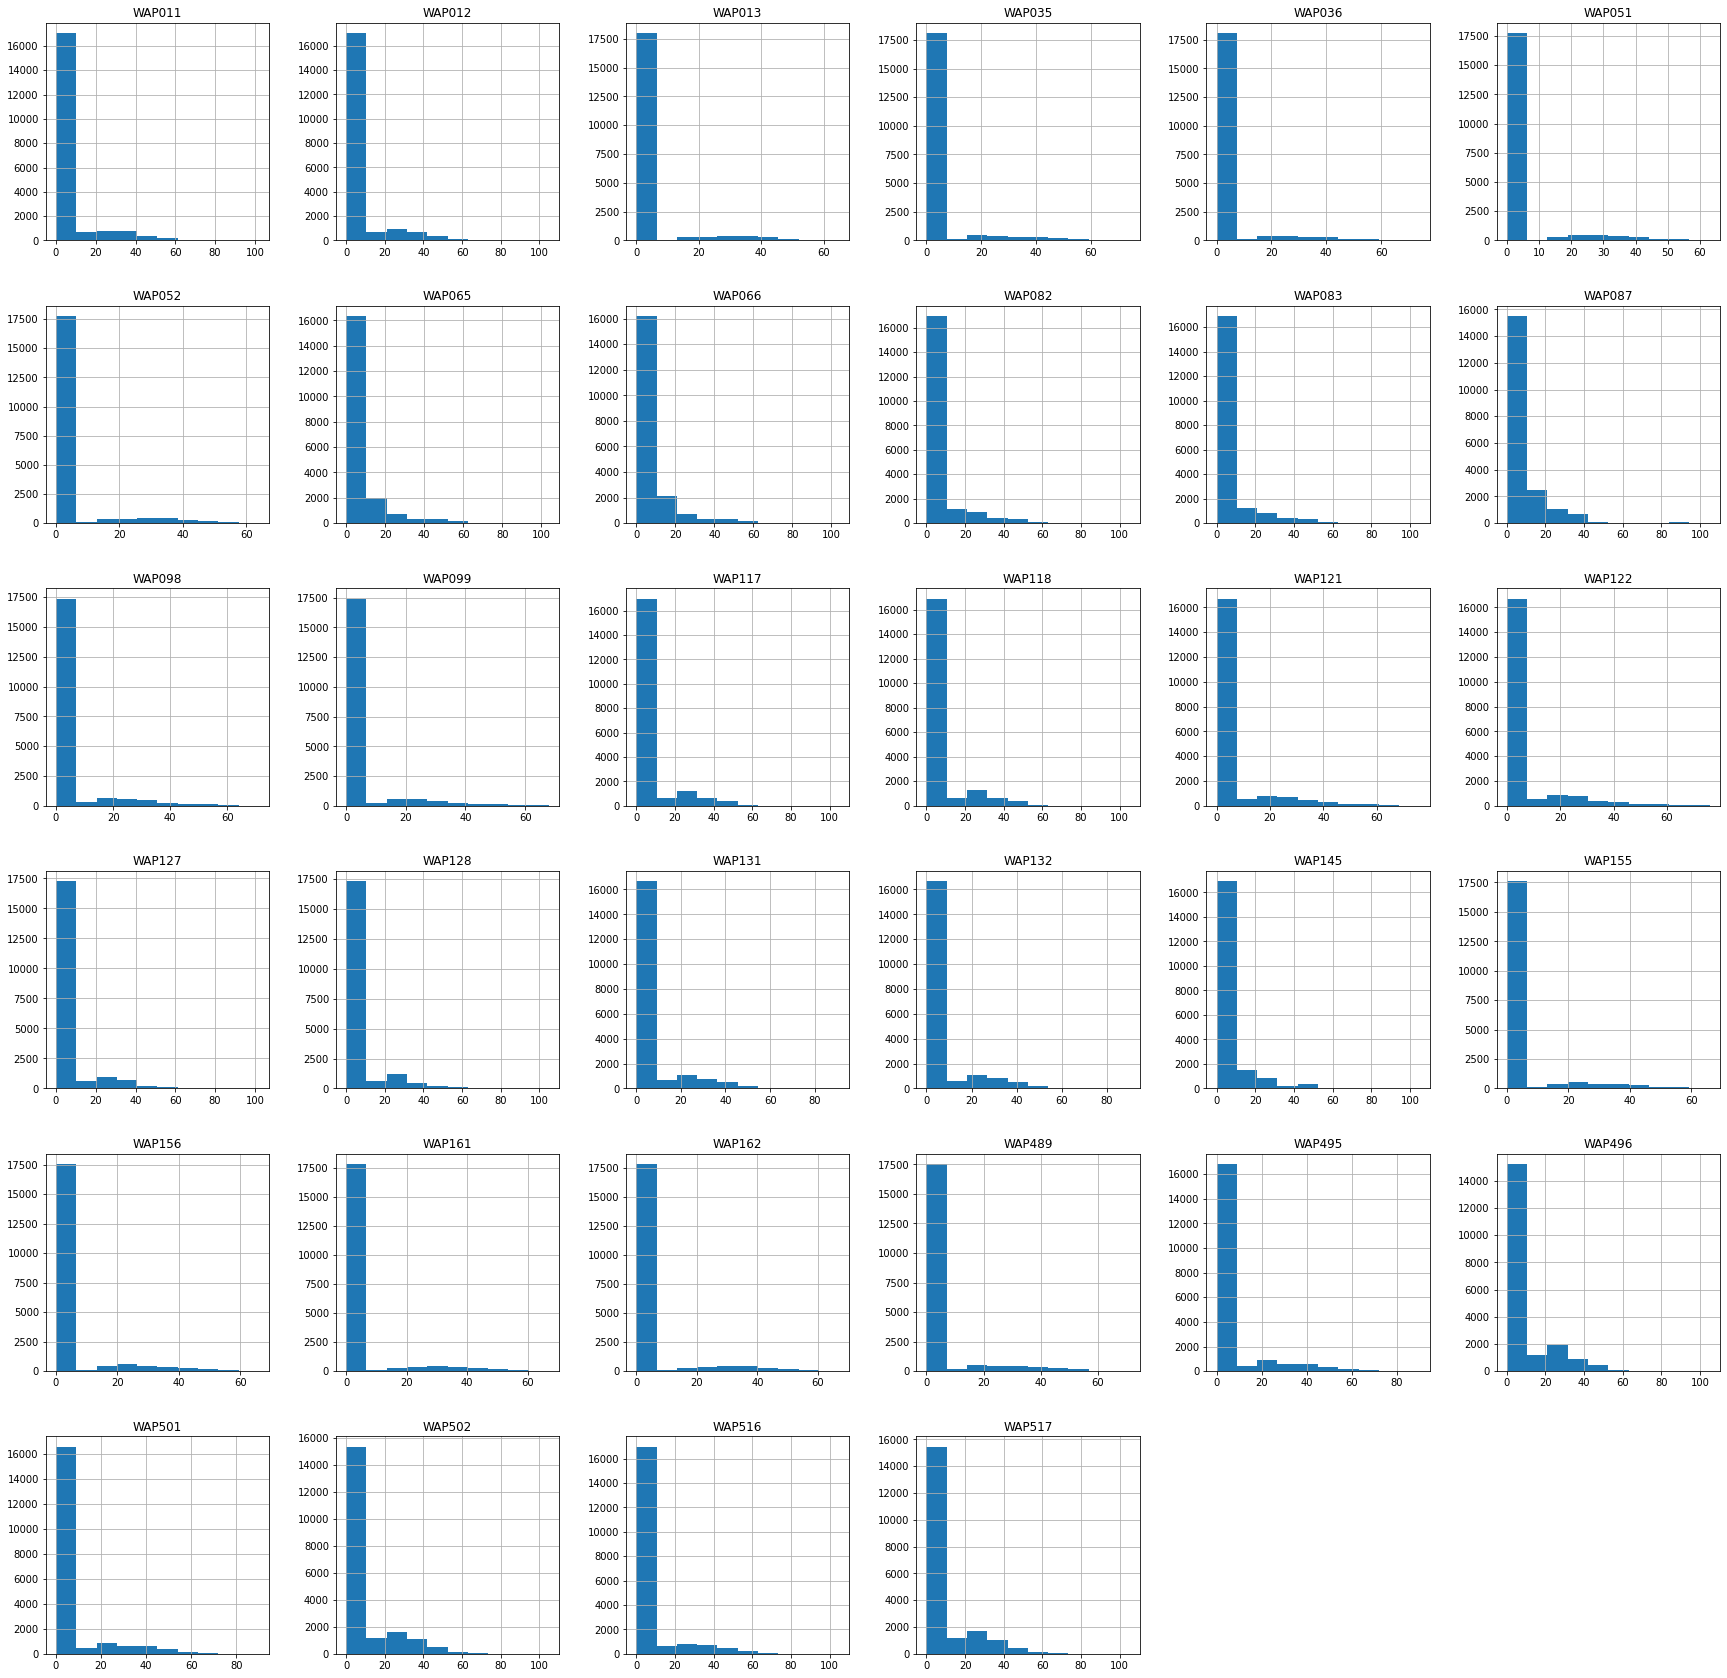

In [13]:
df_X.hist(figsize=[30,30])
plt.show()

In [14]:
import networkx as nx
!git clone https://github.com/alelab-upenn/graph-neural-networks
import sys
sys.path.append('/content/graph-neural-networks/')
#necesita hdf5storage ...
!pip install hdf5storage

import alegnn.modules.architectures as architectures
import alegnn.utils.graphML as graphML
# no sé porqué le cambian los parámetros por defecto a pyplot... por lo menos le saco el latex que en colab no funciona por defecto.
plt.rcParams.update({"text.usetex": False})

import torch

Cloning into 'graph-neural-networks'...
remote: Enumerating objects: 82, done.
remote: Counting objects: 100% (82/82), done.
remote: Compressing objects: 100% (60/60), done.
remote: Total 156 (delta 40), reused 48 (delta 19), pack-reused 74
Receiving objects: 100% (156/156), 47.47 MiB | 30.69 MiB/s, done.
Resolving deltas: 100% (68/68), done.
     |████████████████████████████████| 61kB 4.0MB/s 


In [15]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
enc = OrdinalEncoder(dtype=np.int)
y = enc.fit_transform(df_X['CLASS'].values.reshape(-1,1))
X = df_X.iloc[:,:-1].values

In [16]:
import networkx as nx

def graph_creator(X_G, columns, th=10):
  df_data_train = pd.DataFrame(X_G, columns=columns)
  df_G = pd.DataFrame(columns = ['from', 'to', 'weight']) 

  for i in df_X.columns[:-1]:
    max_val = df_data_train[i].max()
    df_aux_i = df_data_train[df_data_train[i]  > (max_val - th)]
    df_aux_i = df_aux_i.drop(i, axis=1) 
    df_aux_i.head()

  for k, v in df_aux_i.mean().items():
    df_G = df_G.append({'from':i, 'to': k, 'weight': v}, ignore_index=True)

  G = nx.from_pandas_edgelist(df_G, source='from', target='to', edge_attr='weight')  # create_using=nx.DiGraph

  W = nx.to_numpy_array(G)
  # por último le saco la diagonal y la normalizo por su vector propio más grande
  np.fill_diagonal(W,0)
  (w,v) = scipy.sparse.linalg.eigs(W, k=1,which='LM')
  W = W/np.abs(w[0])

  return G, W

In [17]:
def train_model_simple(model, train_data, test_data, batch_size=32, n_epochs=100, epsilon=0.005, weight_decay=1e-2):
    
  optimizer = torch.optim.Adam(model.parameters(), lr=epsilon, weight_decay=weight_decay)

  train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=batch_size, shuffle=False)
  test_loader = torch.utils.data.DataLoader(dataset=test_data, batch_size=len(test_data), shuffle=False)
  loss = torch.nn.CrossEntropyLoss()
  for epoch in range(n_epochs):
      for x_batch, y_batch in train_loader:
        if y_batch.shape[0] == batch_size:
          model.zero_grad()
          y_hat = model(x_batch)
          loss_result = loss(y_hat, y_batch.reshape(batch_size).type(torch.long))
          loss_result.backward()
          optimizer.step()
        else:
          break

  for x_batch, y_batch in test_loader:
      y_hattest = model(x_batch)
    
  return (model, y_hattest)

In [18]:
from sklearn.model_selection import KFold
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import accuracy_score
import scipy
from sklearn.preprocessing import StandardScaler

In [19]:

#Create an experiment with your api key
experiment = Experiment(
    api_key="krnsqImdHJjs4Y1RdFTqfrtjd",
    project_name="aagrafos",
    workspace="facundolezama",
    log_code=True
)

experiment.set_name('ujiindoorloc FLOORS')
experiment.add_tag('ujiindoorloc FLOORS')

COMET INFO: Experiment is live on comet.ml https://www.comet.ml/facundolezama/aagrafos/b8629e7461204d43bb60bc5a323a0044



In [20]:
k=5

kf = KFold(n_splits=k)

lr_list = [1e-3, 1e-4]
bs_list = [64, 128] 
wd_list = [1e-3, 1e-4]
n_fil = [1, 3, 5]

param_grid = {'lr': lr_list, 'bs': bs_list, 'wd': wd_list, 'nfil': n_fil}

best_score = 0
best_params = None

columns = df_X.columns[:-1]

nodos = len(columns)

output_len = len(df_X['CLASS'].value_counts())

epochs = 20

In [21]:
for param in list(ParameterGrid(param_grid)):

  ACC = 0
  for train_index, val_index in kf.split(X):
    X_train_cv, X_val_cv = X[train_index], X[val_index]
    y_train_cv, y_val_cv = y[train_index], y[val_index]

    Graph, W = graph_creator(X_train_cv[:,:nodos+1], columns, th=10) #el grafo lo armo solo con los datos de 2.4Ghz
    gnn_model = architectures.SelectionGNN(dimNodeSignals=[1, 20, 20], nFilterTaps=[param['nfil'],param['nfil']], bias=True, nonlinearity=torch.nn.ReLU, nSelectedNodes=[nodos, nodos], poolingFunction=graphML.NoPool, poolingSize=[1, 1], dimLayersMLP=[output_len], GSO=torch.from_numpy(W).float())

    scaler = StandardScaler()
    X_train_cv = scaler.fit_transform(X_train_cv)
    X_val_cv = scaler.transform(X_val_cv)

    x_training_data = np.reshape(X_train_cv,(X_train_cv.shape[0],1,nodos))
    x_val_data = np.reshape(X_val_cv,(X_val_cv.shape[0],1,nodos))
    y_training_data = np.reshape(y_train_cv,(y_train_cv.shape[0],1,1))
    y_val_data = np.reshape(y_val_cv,(y_val_cv.shape[0],1,1))

    train_data = torch.utils.data.TensorDataset(torch.from_numpy(x_training_data).float(), torch.from_numpy(y_training_data).float())
    val_data = torch.utils.data.TensorDataset(torch.from_numpy(x_val_data).float(), torch.from_numpy(y_val_data).float())

    trained_gnn_model, y_pred = train_model_simple(gnn_model, train_data, val_data, n_epochs=epochs, epsilon=param['lr'], batch_size=param['bs'], weight_decay=param['wd'])

    m = torch.nn.Softmax(dim=1)
    output = m(y_pred)
    ACC += accuracy_score(y_val_cv, np.array(torch.argmax(output, axis=1)))/k

  if ACC > best_score:
      best_score = ACC
      best_params = param

  print("params: ", param)
  print("Accuracy: ", ACC) 
  print()

print("----------- BEST PARAMS --------------")
print("params: ", best_params)
print("Accuracy: ", best_score) 
print()


experiment.log_parameters({'tag': 'ujiindoorloc FLOORS', 'epochs': epochs, 'nodes': nodos, 'class_len': output_len, 'dimNodeSignals':[1, 20, 20]})
experiment.log_parameters(best_params)
experiment.log_metrics({"accuracy_val": best_score})

params:  {'bs': 64, 'lr': 0.001, 'nfil': 1, 'wd': 0.001}
Accuracy:  0.5452266128709682

params:  {'bs': 64, 'lr': 0.001, 'nfil': 1, 'wd': 0.0001}
Accuracy:  0.5478860207409286

params:  {'bs': 64, 'lr': 0.001, 'nfil': 3, 'wd': 0.001}
Accuracy:  0.5404616659106993

params:  {'bs': 64, 'lr': 0.001, 'nfil': 3, 'wd': 0.0001}
Accuracy:  0.5441239444443187

params:  {'bs': 64, 'lr': 0.001, 'nfil': 5, 'wd': 0.001}
Accuracy:  0.5427692659116049

params:  {'bs': 64, 'lr': 0.001, 'nfil': 5, 'wd': 0.0001}
Accuracy:  0.5532018050640509

params:  {'bs': 64, 'lr': 0.0001, 'nfil': 1, 'wd': 0.001}
Accuracy:  0.5354996139660517

params:  {'bs': 64, 'lr': 0.0001, 'nfil': 1, 'wd': 0.0001}
Accuracy:  0.5499942516287262

params:  {'bs': 64, 'lr': 0.0001, 'nfil': 3, 'wd': 0.001}
Accuracy:  0.5380076774089512

params:  {'bs': 64, 'lr': 0.0001, 'nfil': 3, 'wd': 0.0001}
Accuracy:  0.535098234256318

params:  {'bs': 64, 'lr': 0.0001, 'nfil': 5, 'wd': 0.001}
Accuracy:  0.5306832461266417

params:  {'bs': 64, 'lr

# Test

In [3]:
from zipfile import ZipFile
zip_file = ZipFile('UjiIndoorLoc.zip')
df_test = pd.read_csv(zip_file.open('ValidationData.csv'))
df_test.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,WAP013,WAP014,WAP015,WAP016,WAP017,WAP018,WAP019,WAP020,WAP021,WAP022,WAP023,WAP024,WAP025,WAP026,WAP027,WAP028,WAP029,WAP030,WAP031,WAP032,WAP033,WAP034,WAP035,WAP036,WAP037,WAP038,WAP039,WAP040,...,WAP490,WAP491,WAP492,WAP493,WAP494,WAP495,WAP496,WAP497,WAP498,WAP499,WAP500,WAP501,WAP502,WAP503,WAP504,WAP505,WAP506,WAP507,WAP508,WAP509,WAP510,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,-91,100,100,100,...,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,-7515.916799,4.864890e+06,1,1,0,0,0,0,1380872703
1,100,100,100,100,100,100,100,100,100,100,-87,-87,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,-7383.867221,4.864840e+06,4,2,0,0,0,13,1381155054
2,100,100,100,100,100,100,100,100,100,100,-73,-72,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,-7374.302080,4.864847e+06,4,2,0,0,0,13,1381155095
3,100,100,100,100,100,100,100,100,100,100,-77,-75,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,-7365.824883,4.864843e+06,4,2,0,0,0,13,1381155138
4,100,100,100,100,100,100,100,100,100,100,100,100,-79,-79,100,100,100,100,100,100,100,100,-83,-78,100,100,100,100,-62,-62,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,-7641.499303,4.864922e+06,2,0,0,0,0,2,1380877774


In [23]:
df_test['CLASS'] = df_test['BUILDINGID'].astype(str) + df_test['FLOOR'].astype(str)

In [24]:
df_X_test = df_test.loc[:,columns]
df_y_test = df_test['CLASS']
print(df_X_test.shape)

df_X_test.values[df_X_test.values==100] = -105
df_X_test.iloc[:,:] = 105 + df_X_test.values
df_X_test['CLASS'] = df_y_test.values 

df_X_test.describe()

(1111, 34)


,WAP011,WAP012,WAP013,WAP035,WAP036,WAP051,WAP052,WAP065,WAP066,WAP082,WAP083,WAP087,WAP098,WAP099,WAP117,WAP118,WAP121,WAP122,WAP127,WAP128,WAP131,WAP132,WAP145,WAP155,WAP156,WAP161,WAP162,WAP489,WAP495,WAP496,WAP501,WAP502,WAP516,WAP517
count,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.0,1111.0
mean,1.796580,1.830783,4.014401,5.084608,5.128713,5.038704,4.855086,1.850585,2.021602,1.902790,2.045905,2.504950,3.483348,3.597660,2.571557,2.687669,3.054005,3.126913,1.364536,1.480648,2.414941,2.591359,2.049505,5.116112,5.260126,6.621962,6.746175,2.560756,1.479748,1.844284,1.335734,1.902790,0.0,0.0
std,7.694975,7.611998,10.671583,12.394857,12.279353,11.889178,11.663977,7.182637,7.600112,7.017578,7.328007,7.555782,11.505089,11.698123,9.052901,9.164887,10.697847,10.843070,6.497773,6.474297,8.761490,8.978677,7.327492,12.176777,12.265671,13.540504,13.530826,9.100324,6.688251,7.160204,6.699588,6.947778,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
max,60.000000,60.000000,56.000000,62.000000,63.000000,59.000000,59.000000,62.000000,61.000000,62.000000,61.000000,52.000000,65.000000,64.000000,55.000000,62.000000,65.000000,65.000000,56.000000,56.000000,68.000000,68.000000,62.000000,58.000000,58.000000,58.000000,58.000000,57.000000,51.000000,56.000000,55.000000,56.000000,0.0,0.0


In [25]:
escaler = StandardScaler()
X = escaler.fit_transform(X)

y_test = enc.transform(df_X_test['CLASS'].values.reshape(-1,1))
X_test = df_X_test.iloc[:,:-1].values
X_test = escaler.transform(X_test)

x_training_data = np.reshape(X,(X.shape[0],1,nodos))
x_test_data = np.reshape(X_test,(X_test.shape[0],1,nodos))
y_training_data = np.reshape(y,(y.shape[0],1,1))
y_test_data = np.reshape(y_test,(y_test.shape[0],1,1))

train_data = torch.utils.data.TensorDataset(torch.from_numpy(x_training_data).float(), torch.from_numpy(y_training_data).float())
test_data = torch.utils.data.TensorDataset(torch.from_numpy(x_test_data).float(), torch.from_numpy(y_test_data).float())

In [26]:
Graph, W = graph_creator(X[:,:nodos+1], columns, th=10)

gnn_model = architectures.SelectionGNN(dimNodeSignals=[1, 20, 20], nFilterTaps=[best_params['nfil'],best_params['nfil']], bias=True, nonlinearity=torch.nn.ReLU, nSelectedNodes=[nodos, nodos], poolingFunction=graphML.NoPool, poolingSize=[nodos, nodos], dimLayersMLP=[output_len], GSO=torch.from_numpy(W).float())

(trained_gnn_model, y_hattest) = train_model_simple(gnn_model, train_data, test_data, n_epochs=epochs, epsilon=best_params['lr'], batch_size=best_params['bs'], weight_decay=best_params['wd'])

m = torch.nn.Softmax(dim=1)
output = m(y_hattest)   
ACC_test = accuracy_score(y_test, np.array(torch.argmax(output, axis=1)))

print(ACC_test)

experiment.log_metrics({"accuracy_test": ACC_test})

0.5175517551755175


In [27]:
experiment.end()

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/facundolezama/aagrafos/b8629e7461204d43bb60bc5a323a0044
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     accuracy_test : 0.5175517551755175
COMET INFO:     accuracy_val  : 0.5776333137863553
COMET INFO:     loss [45070]  : (0.008744525723159313, 6.064271926879883)
COMET INFO:   Others:
COMET INFO:     Name : ujiindoorloc FLOORS
COMET INFO:   Parameters:
COMET INFO:     bs             : 128
COMET INFO:     class_len      : 13
COMET INFO:     copy           : True
COMET INFO:     dimNodeSignals : [1, 20, 20]
COMET INFO:     epochs         : 20
COMET INFO:     lr             : 0.001
COMET INFO:     nfil           : 1
COMET INFO:     nodes          : 34
COMET INFO:     tag            : ujiindoorloc FLOORS
COMET INFO:     wd             : 0.00

# KNN

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

neigh = KNeighborsClassifier(n_neighbors=15)
param = {'n_neighbors': [5, 10, 15]}

clf_knn= GridSearchCV(neigh, param)
clf_knn.fit(X, y)


GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=15, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [5, 10, 15]}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring=None, verbose=0)

In [29]:
print(clf_knn.best_params_)
print(clf_knn.best_score_)

{'n_neighbors': 5}
0.6986547553369917


In [30]:
K = clf_knn.best_params_['n_neighbors']
neigh = KNeighborsClassifier(n_neighbors=K)
neigh.fit(X, y)
y_pred_knn = neigh.predict(X_test)

In [31]:
print(accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

COMET WARNING: Empty mapping given to log_params({}); ignoring


0.5661566156615662
              precision    recall  f1-score   support

           0       0.37      0.53      0.43        78
           1       0.86      0.66      0.75       208
           2       0.68      0.62      0.65       165
           3       0.83      0.79      0.81        85
           4       0.00      0.00      0.00        30
           5       0.07      0.01      0.01       143
           6       0.25      0.94      0.40        87
           7       0.09      0.02      0.03        47
           8       0.67      0.67      0.67        24
           9       0.89      0.87      0.88       111
          10       0.84      0.50      0.63        54
          11       0.63      0.93      0.75        40
          12       0.67      0.51      0.58        39

    accuracy                           0.57      1111
   macro avg       0.53      0.54      0.51      1111
weighted avg       0.57      0.57      0.54      1111



# FCNN

In [32]:
from sklearn.neural_network import MLPClassifier

In [33]:
clf = MLPClassifier().fit(X, y)
y_pred_fcnn = clf.predict(X_test)

In [34]:
print(accuracy_score(y_test, y_pred_fcnn))
print(classification_report(y_test, y_pred_fcnn))

0.5598559855985599
              precision    recall  f1-score   support

           0       0.40      0.56      0.47        78
           1       0.88      0.62      0.73       208
           2       0.68      0.73      0.71       165
           3       0.91      0.80      0.85        85
           4       0.10      0.97      0.18        30
           5       0.38      0.03      0.06       143
           6       0.55      0.13      0.21        87
           7       0.20      0.02      0.04        47
           8       0.83      0.62      0.71        24
           9       0.87      0.89      0.88       111
          10       0.80      0.61      0.69        54
          11       0.68      1.00      0.81        40
          12       0.80      0.72      0.76        39

    accuracy                           0.56      1111
   macro avg       0.62      0.59      0.55      1111
weighted avg       0.66      0.56      0.56      1111

